<a href="https://colab.research.google.com/github/dylanshaw00/Complete-Python-3-Bootcamp/blob/master/Copy_of_ML_project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np

class FeedforwardNeuralNetwork:
    def __init__(self, layer_sizes):
        """
        Initialize the feedforward neural network.

        Parameters:
        layer_sizes (list): List containing the number of neurons in each layer.
        """
        self.layer_sizes = layer_sizes
        self.num_layers = len(layer_sizes)
        self.weights = []
        self.biases = []

        # Insert missing code!

        for i in range(self.num_layers - 1):
            self.weights.append(np.random.randn(layer_sizes[i+1], layer_sizes[i]) * 0.01)
            self.biases.append(np.random.randn(layer_sizes[i+1], 1))

    def activation_relu(self, z):
        """
        ReLU activation function.
        """
        return np.maximum(0, z)

    def activation_sigmoid(self, z):
        """
        Sigmoid activation function.
        """
        return 1 / (1 + np.exp(-z))

    def activation_derivative_relu(self, z):
        """
        Derivative of ReLU activation function.
        """
        return (z > 0).astype(float)

    def activation_derivative_sigmoid(self, z):
        """
        Derivative of Sigmoid activation function.
        """
        sigmoid = self.activation_sigmoid(z)
        return sigmoid * (1 - sigmoid)


    def feedforward(self, x, input):
        """
        Perform a feedforward pass through the network.
        """
        activations = [x]
        zs = []

        for w, b in zip(self.weights, self.biases):
            z = np.dot(w, activations[-1]) + b
            zs.append(z)
            if input=="sigmoid":
                activation = self.activation_sigmoid(z)
            else:
                activation = self.activation_relu(z)
            activations.append(activation)

        return activations, zs

    def compute_cost(self, y_pred, y_train):
        """
        Compute the cost function using Mean Squared Error (MSE).
        """
        n = y_train.shape[1]
        return np.sum((y_pred - y_train)**2) / n

    def backpropagate(self, x, y_train, input):
        """
        Perform backpropagation to compute gradients.
        """
        # Forward pass
        activations, zs = self.feedforward(x, input)
        y_pred = activations[-1]
        n = y_train.shape[1]
        error = y_pred - y_train


        nabla_w = []
        nabla_b = []
        if input=="sigmoid":
            delta = error * self.activation_derivative_sigmoid(zs[-1])
        else:
            delta = error * self.activation_derivative_relu(zs[-1])
        nabla_w.append(np.dot(delta, activations[-2].T) / n)
        nabla_b.append(np.sum(delta, axis=1, keepdims=True) / n)


        for l in range(2, self.num_layers):
            z = zs[-l]
            if input=="sigmoid":
                delta = np.dot(self.weights[-l+1].T, delta) * self.activation_derivative_sigmoid(z)
            else:
                delta = np.dot(self.weights[-l+1].T, delta) * self.activation_derivative_relu(z)
            nabla_w.insert(0, np.dot(delta, activations[-l-1].T) / n)
            nabla_b.insert(0, np.sum(delta, axis=1, keepdims=True) / n)

        return nabla_w, nabla_b


    def update_parameters(self, nabla_w, nabla_b, learning_rate):
        """
        Update the weights and biases using the computed gradients.
        """
        for i in range(len(self.weights)):
            self.weights[i] -= learning_rate * nabla_w[i]
            self.biases[i] -= learning_rate * nabla_b[i]

    def train(self, x_train, y_train, epochs, learning_rate, batch_size):
        """
        Train the neural network using mini-batch gradient descent.
        """
        m = x_train.shape[1]

        for epoch in range(epochs):
            perm = np.random.permutation(m)
            x_train_shuffled = x_train[:, perm]
            y_train_shuffled = y_train[:, perm]

            for i in range(0, m, batch_size):
                x_batch = x_train_shuffled[:, i:i+batch_size]
                y_batch = y_train_shuffled[:, i:i+batch_size]


                nabla_w, nabla_b = self.backpropagate(x_batch, y_batch,input)


                self.update_parameters(nabla_w, nabla_b, learning_rate)


            activations, _ = self.feedforward(x_train,input)
            y_pred = activations[-1]
            cost = self.compute_cost(y_pred, y_train)
            print(f"Epoch {epoch + 1}/{epochs}, Loss: {cost:.4f}")




Epoch 1/1000, Loss: 0.0922
Epoch 2/1000, Loss: 0.0908
Epoch 3/1000, Loss: 0.0909
Epoch 4/1000, Loss: 0.0938
Epoch 5/1000, Loss: 0.0923
Epoch 6/1000, Loss: 0.0938
Epoch 7/1000, Loss: 0.0911
Epoch 8/1000, Loss: 0.0908
Epoch 9/1000, Loss: 0.0938
Epoch 10/1000, Loss: 0.0908
Epoch 11/1000, Loss: 0.0917
Epoch 12/1000, Loss: 0.0933
Epoch 13/1000, Loss: 0.0906
Epoch 14/1000, Loss: 0.0923
Epoch 15/1000, Loss: 0.0924
Epoch 16/1000, Loss: 0.0909
Epoch 17/1000, Loss: 0.0908
Epoch 18/1000, Loss: 0.0906
Epoch 19/1000, Loss: 0.0980
Epoch 20/1000, Loss: 0.0943
Epoch 21/1000, Loss: 0.0918
Epoch 22/1000, Loss: 0.0934
Epoch 23/1000, Loss: 0.0910
Epoch 24/1000, Loss: 0.0924
Epoch 25/1000, Loss: 0.0944
Epoch 26/1000, Loss: 0.0908
Epoch 27/1000, Loss: 0.0935
Epoch 28/1000, Loss: 0.0914
Epoch 29/1000, Loss: 0.0917
Epoch 30/1000, Loss: 0.0906
Epoch 31/1000, Loss: 0.0922
Epoch 32/1000, Loss: 0.0924
Epoch 33/1000, Loss: 0.0938
Epoch 34/1000, Loss: 0.0911
Epoch 35/1000, Loss: 0.0919
Epoch 36/1000, Loss: 0.0921
E

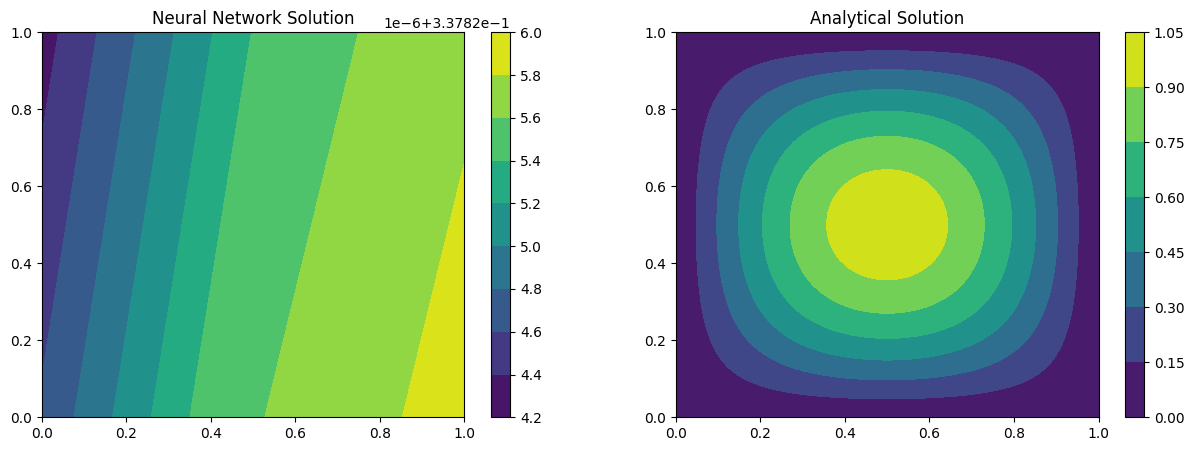

In [4]:
import numpy as np
import matplotlib.pyplot as plt


def analytical_solution(x, y):
    """
    Analytical solution for -Δu = 2π²sin(πx)sin(πy)
    with u = 0 on boundary of [0,1]²
    """
    return np.sin(np.pi * x) * np.sin(np.pi * y)

def f(x, y):
    """
    Right-hand side of the Poisson equation: 2π²sin(πx)sin(πy)
    """
    return 2 * np.pi**2 * np.sin(np.pi * x) * np.sin(np.pi * y)


def generate_training_data(n_points):
    """
    Generate training data points in [0,1]² domain
    """

    x = np.linspace(0, 1, int(np.sqrt(n_points)))
    y = np.linspace(0, 1, int(np.sqrt(n_points)))
    X, Y = np.meshgrid(x, y)

    X_train = np.vstack((X.flatten(), Y.flatten()))
    y_train = analytical_solution(X_train[0], X_train[1]).reshape(1, -1)

    return X_train, y_train

def main():
    n_points = 1000
    X_train, y_train = generate_training_data(n_points)


    layer_sizes = [2, 20, 20, 1]
    nn = FeedforwardNeuralNetwork(layer_sizes)

    epochs = 1000
    learning_rate = 0.01
    batch_size = 32


    nn.train(X_train, y_train, epochs, learning_rate, batch_size)


    x = np.linspace(0, 1, 50)
    y = np.linspace(0, 1, 50)
    X, Y = np.meshgrid(x, y)
    X_test = np.vstack((X.flatten(), Y.flatten()))


    activations, _ = nn.feedforward(X_test, "relu")
    predictions = activations[-1].reshape(50, 50)


    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    im1 = ax1.contourf(X, Y, predictions)
    ax1.set_title('Neural Network Solution')
    plt.colorbar(im1, ax=ax1)

    analytical = analytical_solution(X, Y)
    im2 = ax2.contourf(X, Y, analytical)
    ax2.set_title('Analytical Solution')
    plt.colorbar(im2, ax=ax2)

    plt.show()

if __name__ == "__main__":
    main()

Streaming output truncated to the last 5000 lines.
Epoch 32/500, Loss: 0.2298
Epoch 33/500, Loss: 0.2298
Epoch 34/500, Loss: 0.2298
Epoch 35/500, Loss: 0.2298
Epoch 36/500, Loss: 0.2298
Epoch 37/500, Loss: 0.2298
Epoch 38/500, Loss: 0.2298
Epoch 39/500, Loss: 0.2298
Epoch 40/500, Loss: 0.2298
Epoch 41/500, Loss: 0.2298
Epoch 42/500, Loss: 0.2298
Epoch 43/500, Loss: 0.2298
Epoch 44/500, Loss: 0.2298
Epoch 45/500, Loss: 0.2298
Epoch 46/500, Loss: 0.2298
Epoch 47/500, Loss: 0.2298
Epoch 48/500, Loss: 0.2298
Epoch 49/500, Loss: 0.2298
Epoch 50/500, Loss: 0.2298
Epoch 51/500, Loss: 0.2298
Epoch 52/500, Loss: 0.2298
Epoch 53/500, Loss: 0.2298
Epoch 54/500, Loss: 0.2298
Epoch 55/500, Loss: 0.2298
Epoch 56/500, Loss: 0.2298
Epoch 57/500, Loss: 0.2298
Epoch 58/500, Loss: 0.2298
Epoch 59/500, Loss: 0.2298
Epoch 60/500, Loss: 0.2298
Epoch 61/500, Loss: 0.2298
Epoch 62/500, Loss: 0.2298
Epoch 63/500, Loss: 0.2298
Epoch 64/500, Loss: 0.2298
Epoch 65/500, Loss: 0.2298
Epoch 66/500, Loss: 0.2298
Epoc

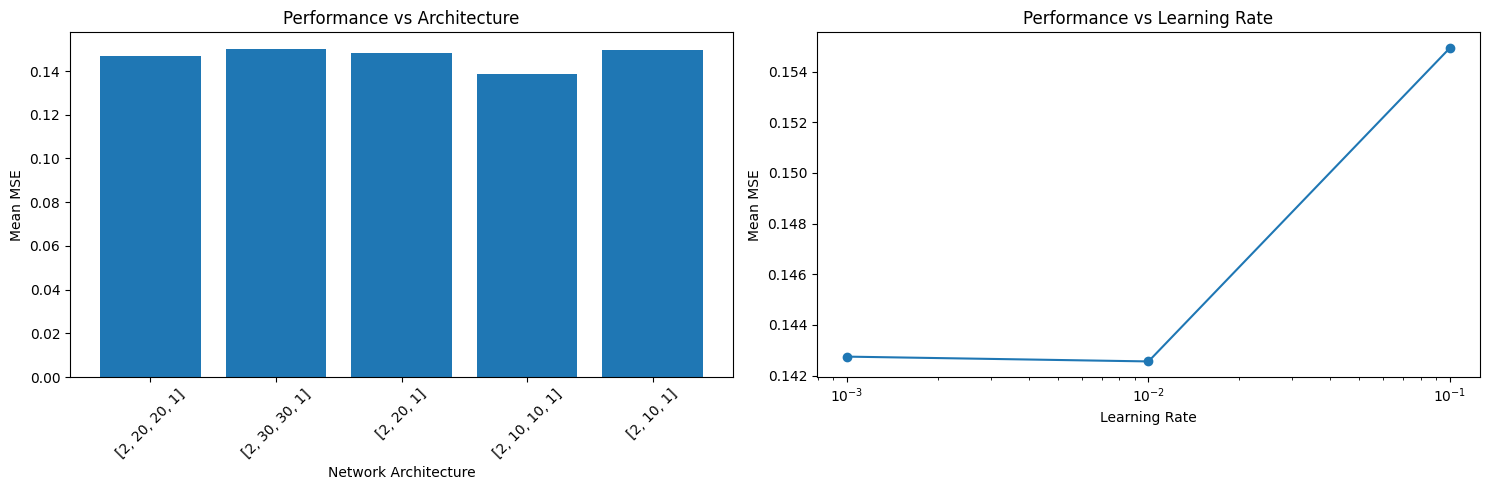

In [3]:
import numpy as np
from itertools import product
import time

class CustomGridSearch:
    def __init__(self, param_grid):
        """
        Initialize grid search with parameter grid

        param_grid: dictionary of parameters to search
        """
        self.param_grid = param_grid
        self.results = []

    def generate_data(self, n_points):
        """
        Generate data for cross-validation
        """
        x = np.linspace(0, 1, int(np.sqrt(n_points)))
        y = np.linspace(0, 1, int(np.sqrt(n_points)))
        X, Y = np.meshgrid(x, y)
        X_data = np.vstack((X.flatten(), Y.flatten()))
        y_data = np.sin(np.pi * X_data[0]) * np.sin(np.pi * X_data[1]).reshape(1, -1)
        return X_data, y_data

    def create_folds(self, n_samples, n_folds):
        """
        Create indices for k-fold cross validation
        """

        indices = np.arange(n_samples)
        np.random.shuffle(indices)

        fold_size = n_samples // n_folds

        folds = []
        for i in range(n_folds):
            start_idx = i * fold_size
            end_idx = start_idx + fold_size if i < n_folds - 1 else n_samples
            val_indices = indices[start_idx:end_idx]
            train_indices = np.concatenate([indices[:start_idx], indices[end_idx:]])
            folds.append((train_indices, val_indices))

        return folds

    def cross_validate(self, X, y, params, n_folds=5):
        """
        Perform k-fold cross validation for given parameters
        """
        n_samples = X.shape[1]
        cv_scores = []

        folds = self.create_folds(n_samples, n_folds)

        for train_idx, val_idx in folds:

            X_train = X[:, train_idx]
            y_train = y[:, train_idx]
            X_val = X[:, val_idx]
            y_val = y[:, val_idx]

            nn = FeedforwardNeuralNetwork(params['layer_sizes'])
            nn.train(
                X_train, y_train,
                epochs=params['epochs'],
                learning_rate=params['learning_rate'],
                batch_size=params['batch_size']
            )

            activations, _ = nn.feedforward(X_val, params['activation'])
            val_pred = activations[-1]
            val_score = np.mean((val_pred - y_val) ** 2)
            cv_scores.append(val_score)

        return np.mean(cv_scores), np.std(cv_scores)

    def fit(self, n_points=1000):
        """
        Perform grid search with cross validation
        """

        X, y = self.generate_data(n_points)


        param_combinations = [dict(zip(self.param_grid.keys(), v))
                            for v in product(*self.param_grid.values())]

        total_combinations = len(param_combinations)
        print(f"Total parameter combinations to evaluate: {total_combinations}")


        for i, params in enumerate(param_combinations, 1):
            start_time = time.time()
            print(f"\nEvaluating combination {i}/{total_combinations}")
            print(f"Parameters: {params}")

            mean_score, std_score = self.cross_validate(X, y, params)
            duration = time.time() - start_time

            self.results.append({
                'params': params,
                'mean_score': mean_score,
                'std_score': std_score,
                'duration': duration
            })

            print(f"Mean MSE: {mean_score:.6f} (±{std_score:.6f})")
            print(f"Duration: {duration:.2f}s")


        self.results.sort(key=lambda x: x['mean_score'])

    def get_best_params(self):
        """
        Return the parameters that gave the best mean cross-validation score
        """
        return self.results[0]['params']


param_grid = {
    'layer_sizes': [
        [2, 10, 1],
        [2, 20, 1],
        [2, 10, 10, 1],
        [2, 20, 20, 1],
        [2, 30, 30, 1]
    ],
    'activation': ['relu', 'sigmoid'],
    'learning_rate': [0.001, 0.01, 0.1],
    'batch_size': [16, 32, 64],
    'epochs': [500]
}

def plot_results(grid_search):
    """
    Visualize the results of the grid search
    """
    import matplotlib.pyplot as plt


    architectures = grid_search.param_grid['layer_sizes']
    learning_rates = grid_search.param_grid['learning_rate']


    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    arch_results = {}
    for result in grid_search.results:
        arch = str(result['params']['layer_sizes'])
        if arch not in arch_results:
            arch_results[arch] = []
        arch_results[arch].append(result['mean_score'])

    architectures = list(arch_results.keys())
    mean_scores = [np.mean(scores) for scores in arch_results.values()]
    ax1.bar(range(len(architectures)), mean_scores)
    ax1.set_xticks(range(len(architectures)))
    ax1.set_xticklabels(architectures, rotation=45)
    ax1.set_xlabel('Network Architecture')
    ax1.set_ylabel('Mean MSE')
    ax1.set_title('Performance vs Architecture')


    lr_results = {}
    for result in grid_search.results:
        lr = result['params']['learning_rate']
        if lr not in lr_results:
            lr_results[lr] = []
        lr_results[lr].append(result['mean_score'])

    learning_rates = sorted(lr_results.keys())
    mean_scores = [np.mean(lr_results[lr]) for lr in learning_rates]
    ax2.plot(learning_rates, mean_scores, marker='o')
    ax2.set_xlabel('Learning Rate')
    ax2.set_ylabel('Mean MSE')
    ax2.set_title('Performance vs Learning Rate')
    ax2.set_xscale('log')

    plt.tight_layout()
    plt.show()

def main():

    np.random.seed(42)


    grid_search = CustomGridSearch(param_grid)


    print("Starting grid search...")
    grid_search.fit()


    best_params = grid_search.get_best_params()
    print("\nBest parameters:")
    for param, value in best_params.items():
        print(f"{param}: {value}")


    print("\nTop 3 configurations:")
    for i, result in enumerate(grid_search.results[:3]):
        print(f"\nRank {i+1}:")
        print(f"Parameters: {result['params']}")
        print(f"Mean MSE: {result['mean_score']:.6f} (±{result['std_score']:.6f})")
        print(f"Training time: {result['duration']:.2f}s")

    plot_results(grid_search)

if __name__ == "__main__":
    main()

### The relu function helps to avoid the vanishing gradients problem. So is a better choice for deeper networks.

## The solution u(x,y) involves smooth variations due to sinosoidal terms so a moderate depth network captures these variations while avoiding overfitting or excessive computation.

### the justification of 20-50 neurons for each layer is supported be empirical research, that this number of neurons should be sufficent to capture the complexity of the 2-d space of solutions.

### normalizing the data ensures all of the features are in a comparable range speeding up the training of the network.

### the choice of the mean squared error loss function is standard for regression tasks.


Starting comparison...

Training with 100 points...
Epoch 1/500, Loss: 0.1368
Epoch 2/500, Loss: 0.1222
Epoch 3/500, Loss: 0.1164
Epoch 4/500, Loss: 0.1083
Epoch 5/500, Loss: 0.1053
Epoch 6/500, Loss: 0.1036
Epoch 7/500, Loss: 0.1030
Epoch 8/500, Loss: 0.1019
Epoch 9/500, Loss: 0.1013
Epoch 10/500, Loss: 0.1015
Epoch 11/500, Loss: 0.1008
Epoch 12/500, Loss: 0.1004
Epoch 13/500, Loss: 0.1004
Epoch 14/500, Loss: 0.1003
Epoch 15/500, Loss: 0.1003
Epoch 16/500, Loss: 0.1003
Epoch 17/500, Loss: 0.1003
Epoch 18/500, Loss: 0.1003
Epoch 19/500, Loss: 0.1004
Epoch 20/500, Loss: 0.1004
Epoch 21/500, Loss: 0.1005
Epoch 22/500, Loss: 0.1003
Epoch 23/500, Loss: 0.1003
Epoch 24/500, Loss: 0.1004
Epoch 25/500, Loss: 0.1004
Epoch 26/500, Loss: 0.1003
Epoch 27/500, Loss: 0.1004
Epoch 28/500, Loss: 0.1004
Epoch 29/500, Loss: 0.1005
Epoch 30/500, Loss: 0.1003
Epoch 31/500, Loss: 0.1003
Epoch 32/500, Loss: 0.1006
Epoch 33/500, Loss: 0.1006
Epoch 34/500, Loss: 0.1004
Epoch 35/500, Loss: 0.1003
Epoch 36/500

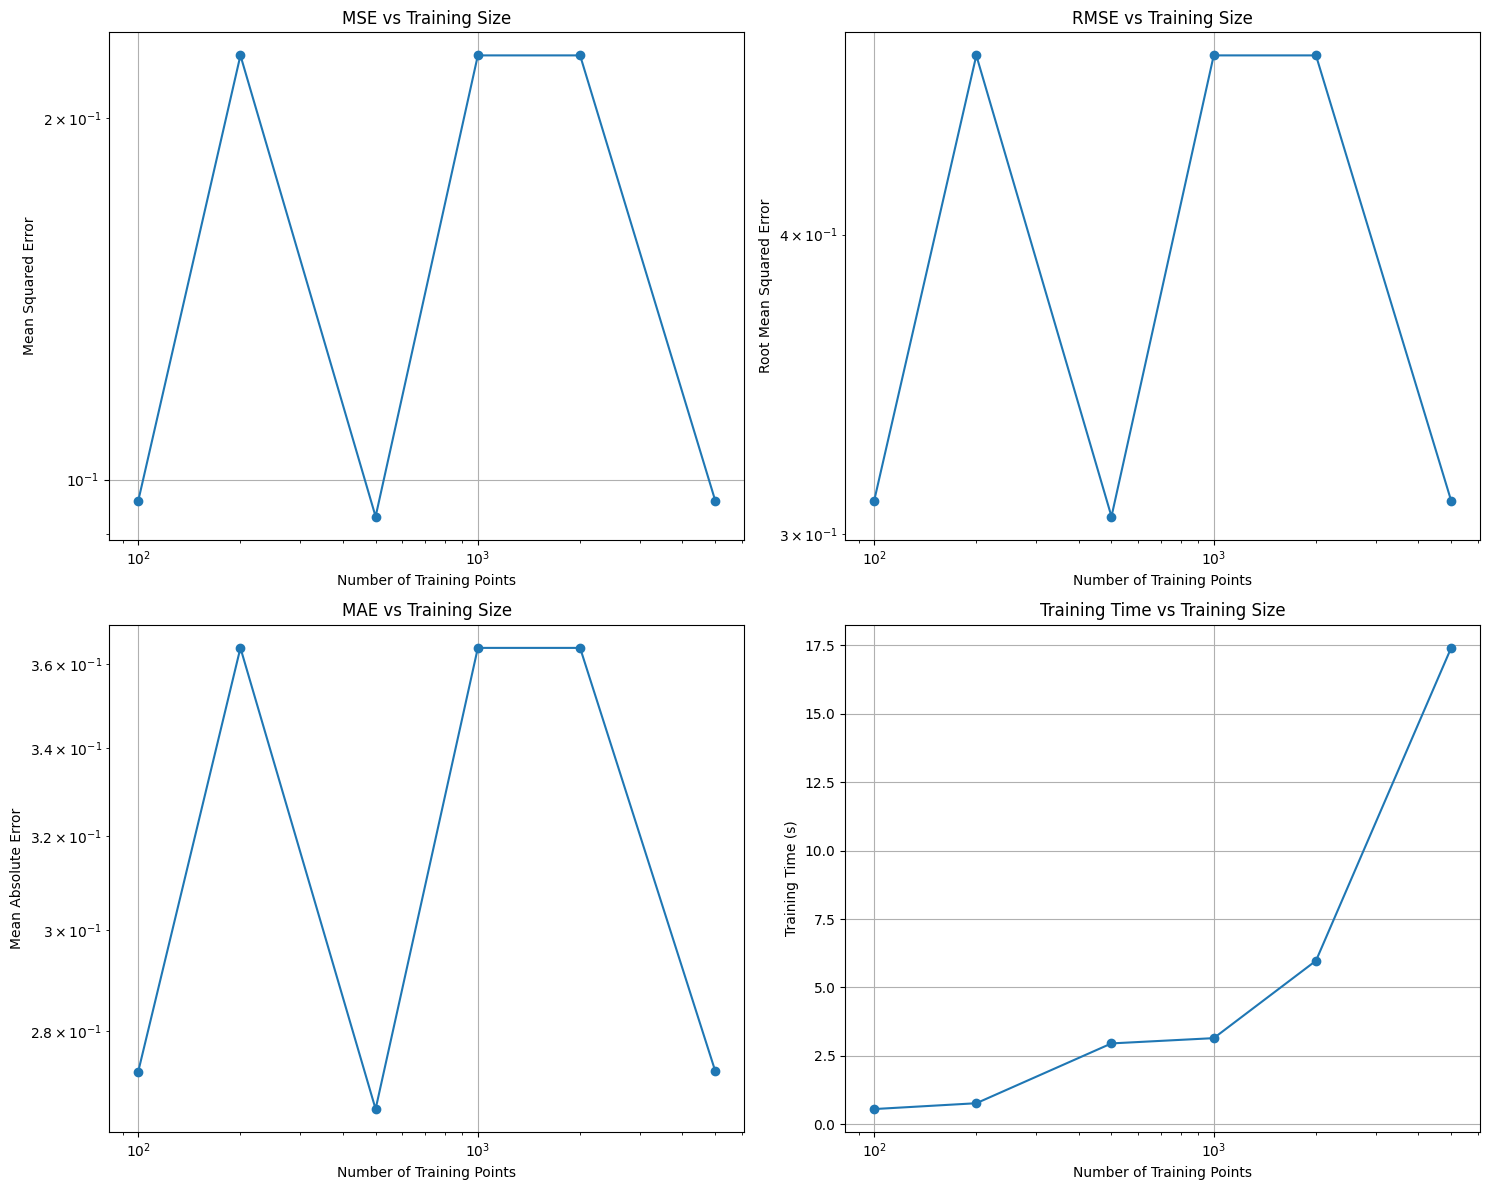

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def get_meshgrid(nx=10, ny=10):
    """
    Create meshgrid for comparison (simulating PoissonSolver2D's get_meshgrid)
    """
    x = np.linspace(0, 1, nx)
    y = np.linspace(0, 1, ny)
    X, Y = np.meshgrid(x, y)
    return X, Y

def analytical_solution(x, y):
    """
    Analytical solution of the 2D Poisson equation
    """
    return np.sin(np.pi * x) * np.sin(np.pi * y)

def generate_training_data(n_points):
    """
    Generate training data points using random sampling
    """

    X_train = np.random.rand(2, n_points)

    y_train = analytical_solution(X_train[0], X_train[1]).reshape(1, -1)
    return X_train, y_train

def compute_error_metrics(predictions, true_values):
    """
    Compute various error metrics
    """
    mse = np.mean((predictions - true_values) ** 2)
    rmse = np.sqrt(mse)
    mae = np.mean(np.abs(predictions - true_values))
    max_error = np.max(np.abs(predictions - true_values))

    return {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'Max Error': max_error
    }

def compare_solvers(training_sizes, nx=20, ny=20):
    """
    Compare FNN and FEM solvers for different training data sizes
    """

    X_test, Y_test = get_meshgrid(nx, ny)
    test_points = np.vstack((X_test.flatten(), Y_test.flatten()))
    true_solution = analytical_solution(test_points[0], test_points[1])


    results = {
        'train_sizes': training_sizes,
        'fnn_errors': [],
        'training_times': []
    }


    for n_points in training_sizes:
        print(f"\nTraining with {n_points} points...")

        X_train, y_train = generate_training_data(n_points)


        nn = FeedforwardNeuralNetwork([2, 20, 20, 1])


        start_time = time.time()
        nn.train(X_train, y_train, epochs=500, learning_rate=0.01, batch_size=32)
        training_time = time.time() - start_time


        activations, _ = nn.feedforward(test_points, "relu")
        fnn_predictions = activations[-1].flatten()


        errors = compute_error_metrics(fnn_predictions, true_solution)
        results['fnn_errors'].append(errors)
        results['training_times'].append(training_time)

        print(f"Training time: {training_time:.2f}s")
        print("Error metrics:")
        for metric, value in errors.items():
            print(f"{metric}: {value:.6f}")

    return results

def plot_comparison(results):
    """
    Visualize the comparison results
    """
    training_sizes = results['train_sizes']


    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))


    mse_values = [errors['MSE'] for errors in results['fnn_errors']]
    ax1.plot(training_sizes, mse_values, 'o-', label='FNN')
    ax1.set_xlabel('Number of Training Points')
    ax1.set_ylabel('Mean Squared Error')
    ax1.set_title('MSE vs Training Size')
    ax1.set_xscale('log')
    ax1.set_yscale('log')
    ax1.grid(True)

    rmse_values = [errors['RMSE'] for errors in results['fnn_errors']]
    ax2.plot(training_sizes, rmse_values, 'o-', label='FNN')
    ax2.set_xlabel('Number of Training Points')
    ax2.set_ylabel('Root Mean Squared Error')
    ax2.set_title('RMSE vs Training Size')
    ax2.set_xscale('log')
    ax2.set_yscale('log')
    ax2.grid(True)


    mae_values = [errors['MAE'] for errors in results['fnn_errors']]
    ax3.plot(training_sizes, mae_values, 'o-', label='FNN')
    ax3.set_xlabel('Number of Training Points')
    ax3.set_ylabel('Mean Absolute Error')
    ax3.set_title('MAE vs Training Size')
    ax3.set_xscale('log')
    ax3.set_yscale('log')
    ax3.grid(True)


    ax4.plot(training_sizes, results['training_times'], 'o-', label='FNN')
    ax4.set_xlabel('Number of Training Points')
    ax4.set_ylabel('Training Time (s)')
    ax4.set_title('Training Time vs Training Size')
    ax4.set_xscale('log')
    ax4.grid(True)

    plt.tight_layout()
    plt.show()

def main():

    training_sizes = [100, 200, 500, 1000, 2000, 5000]

    print("Starting comparison...")
    results = compare_solvers(training_sizes)


    plot_comparison(results)


    print("\nSummary of results:")
    for i, n_points in enumerate(training_sizes):
        print(f"\nTraining size: {n_points}")
        print(f"Training time: {results['training_times'][i]:.2f}s")
        for metric, value in results['fnn_errors'][i].items():
            print(f"{metric}: {value:.6f}")

if __name__ == "__main__":
    main()

Q.2

In [1]:
import numpy as np

class DeepONet:
    def __init__(self, branch_layer_sizes, trunk_layer_sizes):
        """
        Initialize the DeepONet architecture.

        Parameters:
        branch_layer_sizes (list): List containing the number of neurons in each layer for the branch net.
        trunk_layer_sizes (list): List containing the number of neurons in each layer for the trunk net.
        """
        self.branch_net = FeedforwardNeuralNetwork(branch_layer_sizes)
        self.trunk_net = FeedforwardNeuralNetwork(trunk_layer_sizes)

        assert branch_layer_sizes[-1] == trunk_layer_sizes[-1], "Output dimensions of branch and trunk nets must match"

        self.output_dim = branch_layer_sizes[-1]

    def feedforward(self, x_branch, x_trunk):
        """
        Perform a feedforward pass through the DeepONet.

        Parameters:
        x_branch (numpy.ndarray): Input array for the branch net (a,b parameters).
        x_trunk (numpy.ndarray): Input array for the trunk net (x,y coordinates).

        Returns:
        numpy.ndarray: Output of the DeepONet.
        """
        # Forward pass through branch network
        branch_activations, branch_zs = self.branch_net.feedforward(x_branch, "relu")
        branch_output = branch_activations[-1]  # Shape: (N, m) where N is output dim

        # Forward pass through trunk network
        trunk_activations, trunk_zs = self.trunk_net.feedforward(x_trunk, "relu")
        trunk_output = trunk_activations[-1]  # Shape: (N, m) where N is output dim

        # Compute dot product between branch and trunk outputs
        output = np.sum(branch_output * trunk_output, axis=0, keepdims=True)

        return output, (branch_activations, branch_zs, trunk_activations, trunk_zs)

    def compute_cost(self, y_pred, y_train):
        """
        Compute the cost function using Mean Squared Error (MSE).

        Parameters:
        y_pred (numpy.ndarray): Predicted values
        y_train (numpy.ndarray): True values

        Returns:
        float: Cost value
        """
        return np.mean((y_pred - y_train)**2)

    def backpropagate(self, x_branch, x_trunk, y):
        """
        Perform backpropagation to compute gradients.

        Parameters:
        x_branch (numpy.ndarray): Input array for the branch net
        x_trunk (numpy.ndarray): Input array for the trunk net
        y (numpy.ndarray): True labels

        Returns:
        tuple: Gradients of weights and biases for both branch and trunk nets
        """

        output, (branch_activations, branch_zs, trunk_activations, trunk_zs) = self.feedforward(x_branch, x_trunk)

        error = output - y
        m = y.shape[1]


        nabla_w_branch = [np.zeros_like(w) for w in self.branch_net.weights]
        nabla_b_branch = [np.zeros_like(b) for b in self.branch_net.biases]
        nabla_w_trunk = [np.zeros_like(w) for w in self.trunk_net.weights]
        nabla_b_trunk = [np.zeros_like(b) for b in self.trunk_net.biases]


        delta_branch = error * trunk_activations[-1]
        for l in range(len(self.branch_net.weights)):
            layer = -(l + 1)
            delta_branch = delta_branch * self.branch_net.activation_derivative_relu(branch_zs[layer])
            nabla_w_branch[layer] = np.dot(delta_branch, branch_activations[layer-1].T) / m
            nabla_b_branch[layer] = np.sum(delta_branch, axis=1, keepdims=True) / m
            if l < len(self.branch_net.weights) - 1:
                delta_branch = np.dot(self.branch_net.weights[layer].T, delta_branch)


        delta_trunk = error * branch_activations[-1]
        for l in range(len(self.trunk_net.weights)):
            layer = -(l + 1)
            delta_trunk = delta_trunk * self.trunk_net.activation_derivative_relu(trunk_zs[layer])
            nabla_w_trunk[layer] = np.dot(delta_trunk, trunk_activations[layer-1].T) / m
            nabla_b_trunk[layer] = np.sum(delta_trunk, axis=1, keepdims=True) / m
            if l < len(self.trunk_net.weights) - 1:
                delta_trunk = np.dot(self.trunk_net.weights[layer].T, delta_trunk)

        return nabla_w_branch, nabla_b_branch, nabla_w_trunk, nabla_b_trunk

    def update_parameters(self, nabla_w_branch, nabla_b_branch, nabla_w_trunk, nabla_b_trunk, learning_rate):
        """
        Updateing the weights and biases using the gradients.

        Parameters:
        nabla_w_branch (list): Gradients of weights for the branch net
        nabla_b_branch (list): Gradients of biases for the branch net
        nabla_w_trunk (list): Gradients of weights for the trunk net
        nabla_b_trunk (list): Gradients of biases for the trunk net
        learning_rate (float): Learning rate
        """

        for i in range(len(self.branch_net.weights)):
            self.branch_net.weights[i] -= learning_rate * nabla_w_branch[i]
            self.branch_net.biases[i] -= learning_rate * nabla_b_branch[i]


        for i in range(len(self.trunk_net.weights)):
            self.trunk_net.weights[i] -= learning_rate * nabla_w_trunk[i]
            self.trunk_net.biases[i] -= learning_rate * nabla_b_trunk[i]

    def train(self, x_branch, x_trunk, y_train, epochs, learning_rate, batch_size):
        """
        Training the DeepONet using mini-batch gradient descent.

        Parameters:
        x_branch (numpy.ndarray): Training data for the branch net
        x_trunk (numpy.ndarray): Training data for the trunk net
        y_train (numpy.ndarray): Training labels
        epochs (int): Number of epochs
        learning_rate (float): Learning rate
        batch_size (int): Size of each mini-batch
        """
        m = y_train.shape[1]

        for epoch in range(epochs):

            perm = np.random.permutation(m)
            x_branch_shuffled = x_branch[:, perm]
            x_trunk_shuffled = x_trunk[:, perm]
            y_train_shuffled = y_train[:, perm]


            for i in range(0, m, batch_size):
                x_branch_batch = x_branch_shuffled[:, i:i+batch_size]
                x_trunk_batch = x_trunk_shuffled[:, i:i+batch_size]
                y_batch = y_train_shuffled[:, i:i+batch_size]


                nabla_w_branch, nabla_b_branch, nabla_w_trunk, nabla_b_trunk = self.backpropagate(
                    x_branch_batch, x_trunk_batch, y_batch
                )


                self.update_parameters(
                    nabla_w_branch, nabla_b_branch, nabla_w_trunk, nabla_b_trunk, learning_rate
                )

            output, _ = self.feedforward(x_branch, x_trunk)
            loss = self.compute_cost(output, y_train)
            print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss:.6f}")

In [5]:

def test_deeponet():

    branch_net_sizes = [2, 20, 20, 10]
    trunk_net_sizes = [2, 20, 20, 10]


    model = DeepONet(branch_net_sizes, trunk_net_sizes)


    n_points = 1000
    a = b = 1.0
    x = np.random.rand(1, n_points)
    y = np.random.rand(1, n_points)


    x_branch = np.tile(np.array([[a], [b]]), (1, n_points))
    x_trunk = np.vstack((x, y))

    y_train = np.sin(np.pi * x) * np.sin(np.pi * y)


    model.train(x_branch, x_trunk, y_train,
               epochs=100,
               learning_rate=0.001,
               batch_size=32)

    return model


model = test_deeponet()

Epoch 1/100, Loss: 0.109610
Epoch 2/100, Loss: 0.088542
Epoch 3/100, Loss: 0.086080
Epoch 4/100, Loss: 0.085966
Epoch 5/100, Loss: 0.085975
Epoch 6/100, Loss: 0.085914
Epoch 7/100, Loss: 0.086083
Epoch 8/100, Loss: 0.085899
Epoch 9/100, Loss: 0.085899
Epoch 10/100, Loss: 0.085902
Epoch 11/100, Loss: 0.085899
Epoch 12/100, Loss: 0.085975
Epoch 13/100, Loss: 0.085920
Epoch 14/100, Loss: 0.085901
Epoch 15/100, Loss: 0.085909
Epoch 16/100, Loss: 0.085905
Epoch 17/100, Loss: 0.085951
Epoch 18/100, Loss: 0.085907
Epoch 19/100, Loss: 0.085942
Epoch 20/100, Loss: 0.085915
Epoch 21/100, Loss: 0.085957
Epoch 22/100, Loss: 0.085905
Epoch 23/100, Loss: 0.085899
Epoch 24/100, Loss: 0.085899
Epoch 25/100, Loss: 0.085958
Epoch 26/100, Loss: 0.085899
Epoch 27/100, Loss: 0.085903
Epoch 28/100, Loss: 0.086099
Epoch 29/100, Loss: 0.085945
Epoch 30/100, Loss: 0.085921
Epoch 31/100, Loss: 0.085908
Epoch 32/100, Loss: 0.085919
Epoch 33/100, Loss: 0.085910
Epoch 34/100, Loss: 0.085905
Epoch 35/100, Loss: 0.0

In [ ]:
#b)
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
import time

def analytical_solution(x, y, a):
    """
    Analytical solution for the Poisson equation with parameter a
    """
    return a * np.sin(np.pi * x) * np.sin(np.pi * y)

def generate_training_data(n_points, n_params):
    """
    Generate training data with varying a parameter
    """

    x = np.random.rand(n_points)
    y = np.random.rand(n_points)


    a_values = np.random.uniform(-1, 1, n_params)


    a_mesh, x_mesh, y_mesh = np.meshgrid(a_values, x, y, indexing='ij')


    x_branch = np.vstack((a_mesh.flatten(), np.zeros_like(a_mesh.flatten())))  # (a, b=0)
    x_trunk = np.vstack((x_mesh.flatten(), y_mesh.flatten()))  # (x, y)


    y_train = analytical_solution(x_mesh, y_mesh, a_mesh).flatten().reshape(1, -1)

    return x_branch, x_trunk, y_train

class GridSearchCV:
    def __init__(self, param_grid):
        self.param_grid = param_grid
        self.results = []

    def create_model(self, params):
        """
        Create DeepONet with given parameters
        """
        return DeepONet(params['branch_sizes'], params['trunk_sizes'])

    def cross_validate(self, x_branch, x_trunk, y_train, params, n_folds=5):
        """
        Perform k-fold cross validation
        """
        n_samples = y_train.shape[1]
        fold_size = n_samples // n_folds
        indices = np.random.permutation(n_samples)

        cv_scores = []
        for i in range(n_folds):

            val_idx = indices[i*fold_size:(i+1)*fold_size]
            train_idx = np.concatenate([indices[:i*fold_size], indices[(i+1)*fold_size:]])


            x_branch_train = x_branch[:, train_idx]
            x_trunk_train = x_trunk[:, train_idx]
            y_train_fold = y_train[:, train_idx]
            x_branch_val = x_branch[:, val_idx]
            x_trunk_val = x_trunk[:, val_idx]
            y_val = y_train[:, val_idx]


            model = self.create_model(params)
            model.train(x_branch_train, x_trunk_train, y_train_fold,
                       epochs=params['epochs'],
                       learning_rate=params['learning_rate'],
                       batch_size=params['batch_size'])


            pred, _ = model.feedforward(x_branch_val, x_trunk_val)
            mse = np.mean((pred - y_val) ** 2)
            cv_scores.append(mse)

        return np.mean(cv_scores), np.std(cv_scores)

    def fit(self, n_points=1000, n_params=10):
        """
        Perform grid search
        """

        x_branch, x_trunk, y_train = generate_training_data(n_points, n_params)

        param_combinations = [dict(zip(self.param_grid.keys(), v))
                            for v in product(*self.param_grid.values())]

        for params in param_combinations:
            start_time = time.time()
            mean_score, std_score = self.cross_validate(x_branch, x_trunk, y_train, params)
            duration = time.time() - start_time

            self.results.append({
                'params': params,
                'mean_score': mean_score,
                'std_score': std_score,
                'duration': duration
            })

            print(f"\nParameters: {params}")
            print(f"Mean MSE: {mean_score:.6f} (±{std_score:.6f})")
            print(f"Duration: {duration:.2f}s")

        self.results.sort(key=lambda x: x['mean_score'])

def test_unseen_values(model, a_test_values):
    """
    Test model on unseen a values
    """

    x = np.linspace(0, 1, 50)
    y = np.linspace(0, 1, 50)
    X, Y = np.meshgrid(x, y)

    results = []
    for a in a_test_values:

        x_branch = np.vstack((np.full(X.size, a), np.zeros(X.size)))
        x_trunk = np.vstack((X.flatten(), Y.flatten()))


        pred, _ = model.feedforward(x_branch, x_trunk)
        pred = pred.reshape(50, 50)


        true_sol = analytical_solution(X, Y, a)


        mse = np.mean((pred - true_sol) ** 2)
        results.append({
            'a': a,
            'mse': mse,
            'pred': pred,
            'true': true_sol
        })

    return results

def plot_results(results):
    """
    Visualize results for unseen values
    """
    n_values = len(results)
    fig, axs = plt.subplots(n_values, 3, figsize=(15, 5*n_values))

    for i, result in enumerate(results):

        im1 = axs[i, 0].contourf(result['pred'])
        axs[i, 0].set_title(f'Prediction (a={result["a"]:.2f})')
        plt.colorbar(im1, ax=axs[i, 0])


        im2 = axs[i, 1].contourf(result['true'])
        axs[i, 1].set_title(f'True Solution (a={result["a"]:.2f})')
        plt.colorbar(im2, ax=axs[i, 1])

        error = np.abs(result['pred'] - result['true'])
        im3 = axs[i, 2].contourf(error)
        axs[i, 2].set_title(f'Absolute Error (MSE={result["mse"]:.6f})')
        plt.colorbar(im3, ax=axs[i, 2])

    plt.tight_layout()
    plt.show()

def main():

    param_grid = {
        'branch_sizes': [
            [2, 20, 10],
            [2, 20, 20, 10],
            [2, 40, 20, 10]
        ],
        'trunk_sizes': [
            [2, 20, 10],
            [2, 20, 20, 10],
            [2, 40, 20, 10]
        ],
        'learning_rate': [0.001, 0.01],
        'batch_size': [32, 64],
        'epochs': [200]
    }


    print("Starting grid search...")
    grid_search = GridSearchCV(param_grid)
    grid_search.fit()


    best_params = grid_search.results[0]['params']
    print("\nBest parameters:", best_params)


    model = DeepONet(best_params['branch_sizes'], best_params['trunk_sizes'])
    x_branch, x_trunk, y_train = generate_training_data(1000, 20)
    model.train(x_branch, x_trunk, y_train,
               epochs=best_params['epochs'],
               learning_rate=best_params['learning_rate'],
               batch_size=best_params['batch_size'])


    unseen_a = [-0.8, -0.3, 0.3, 0.8]
    test_results = test_unseen_values(model, unseen_a)


    plot_results(test_results)

if __name__ == "__main__":
    main()

Starting grid search...
Epoch 1/200, Loss: 0.058999


In [ ]:
#c)
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
import time

def analytical_solution(x, y, a, b):
    """
    Analytical solution for the Poisson equation with parameters a and b
    """
    return a * np.sin(np.pi * x) * np.sin(np.pi * y) + b * np.sin(2 * np.pi * x) * np.sin(2 * np.pi * y)

def generate_training_data(n_points, n_params):
    """
    Generate training data with varying a and b parameters
    """

    x = np.random.rand(n_points)
    y = np.random.rand(n_points)


    a_values = np.random.uniform(-1, 1, n_params)
    b_values = np.random.uniform(-1, 1, n_params)


    a_mesh, b_mesh, x_mesh, y_mesh = np.meshgrid(a_values, b_values, x, y, indexing='ij')


    x_branch = np.vstack((a_mesh.flatten(), b_mesh.flatten()))
    x_trunk = np.vstack((x_mesh.flatten(), y_mesh.flatten()))


    y_train = analytical_solution(x_mesh, y_mesh, a_mesh, b_mesh).flatten().reshape(1, -1)

    return x_branch, x_trunk, y_train

def test_unseen_values(model, test_params):
    """
    Test model on unseen parameter combinations
    """

    x = np.linspace(0, 1, 50)
    y = np.linspace(0, 1, 50)
    X, Y = np.meshgrid(x, y)

    results = []
    for a, b in test_params:

        x_branch = np.vstack((np.full(X.size, a), np.full(X.size, b)))
        x_trunk = np.vstack((X.flatten(), Y.flatten()))


        pred, _ = model.feedforward(x_branch, x_trunk)
        pred = pred.reshape(50, 50)


        true_sol = analytical_solution(X, Y, a, b)


        mse = np.mean((pred - true_sol) ** 2)
        results.append({
            'a': a,
            'b': b,
            'mse': mse,
            'pred': pred,
            'true': true_sol
        })

    return results

def plot_results(results):
    """
    Visualize results for unseen values
    """
    n_values = len(results)
    fig, axs = plt.subplots(n_values, 3, figsize=(15, 5*n_values))

    for i, result in enumerate(results):

        im1 = axs[i, 0].contourf(result['pred'])
        axs[i, 0].set_title(f'Prediction (a={result["a"]:.2f}, b={result["b"]:.2f})')
        plt.colorbar(im1, ax=axs[i, 0])


        im2 = axs[i, 1].contourf(result['true'])
        axs[i, 1].set_title(f'True Solution (a={result["a"]:.2f}, b={result["b"]:.2f})')
        plt.colorbar(im2, ax=axs[i, 1])


        error = np.abs(result['pred'] - result['true'])
        im3 = axs[i, 2].contourf(error)
        axs[i, 2].set_title(f'Absolute Error (MSE={result["mse"]:.6f})')
        plt.colorbar(im3, ax=axs[i, 2])

    plt.tight_layout()
    plt.show()

def main():

    param_grid = {
        'branch_sizes': [
            [2, 40, 20, 10],
            [2, 40, 40, 20],
            [2, 60, 40, 20]
        ],
        'trunk_sizes': [
            [2, 40, 20, 10],
            [2, 40, 40, 20],
            [2, 60, 40, 20]
        ],
        'learning_rate': [0.0001, 0.001],
        'batch_size': [32, 64],
        'epochs': [300]
    }


    print("Starting grid search...")
    grid_search = GridSearchCV(param_grid)
    grid_search.fit(n_points=1000, n_params=15)


    best_params = grid_search.results[0]['params']
    print("\nBest parameters:", best_params)


    model = DeepONet(best_params['branch_sizes'], best_params['trunk_sizes'])
    x_branch, x_trunk, y_train = generate_training_data(1000, 25)
    model.train(x_branch, x_trunk, y_train,
               epochs=best_params['epochs'],
               learning_rate=best_params['learning_rate'],
               batch_size=best_params['batch_size'])


    test_params = [
        (-0.8, -0.8), (-0.8, 0.8),
        (0.8, -0.8), (0.8, 0.8),
        (0.0, 0.5), (-0.5, 0.0)
    ]
    test_results = test_unseen_values(model, test_params)


    plot_results(test_results)

if __name__ == "__main__":
    main()